<a href="https://colab.research.google.com/github/GloriaMoraaRiechi/Spring-2025/blob/main/CSE817_QUESTION1_CNN_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN IMAGE CLASSIFICATION**

## Apply CNN for multiclass classification of brain images. Show accuracy, confusion matrix, ROC and loss curve.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import shutil

# Create a .kaggle folder and move the file
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set file permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets download -d marcopinamonti/alzheimer-mri-4-classes-dataset
!unzip -q alzheimer-mri-4-classes-dataset.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
replace Alzheimer_MRI_4_classes_dataset/MildDemented/1 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_MRI_4_classes_dataset/MildDemented/1 (11).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_MRI_4_classes_dataset/MildDemented/1 (12).jpg? [y]es, [n]o, [

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_dir = "/content/Alzheimer_MRI_4_classes_dataset"

# Create ImageDataGenerators
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.4864 - loss: 1.3683 - val_accuracy: 0.5973 - val_loss: 0.8571
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6364 - loss: 0.8168 - val_accuracy: 0.6701 - val_loss: 0.7380
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7701 - loss: 0.5550 - val_accuracy: 0.7389 - val_loss: 0.5753
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.8423 - loss: 0.3859 - val_accuracy: 0.7545 - val_loss: 0.5483
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9050 - loss: 0.2391 - val_accuracy: 0.8358 - val_loss: 0.3937
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9387 - loss: 0.1589 - val_accuracy: 0.8428 - val_loss: 0.3861
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9611 - loss: 0.1159 - val_accuracy: 0.8600 - val_loss: 0.3752
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9754 - loss: 0.0710 - val_accuracy: 0.857

### Evaluation

#### Accuracy

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 369ms/step - accuracy: 0.8715 - loss: 0.3361
Validation Accuracy: 0.8905


#### Loss Curve

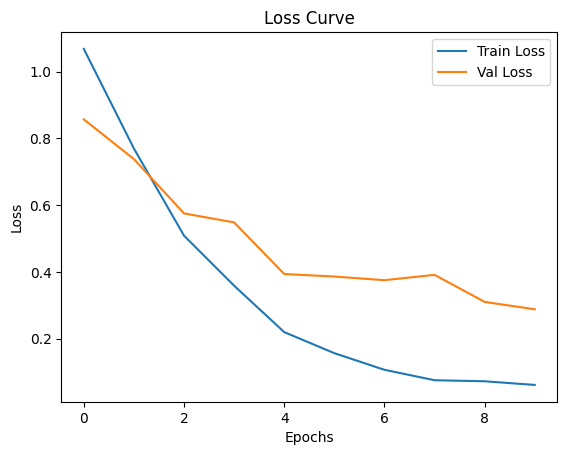

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Confusion Matrix

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 595ms/step


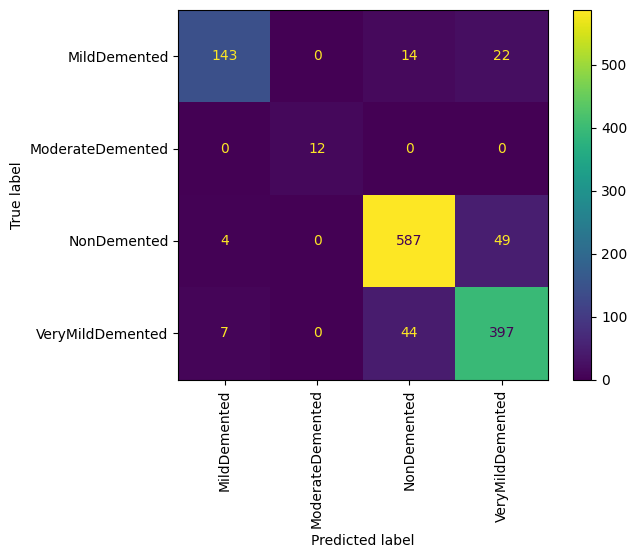

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(xticks_rotation='vertical')

#### ROC Curve

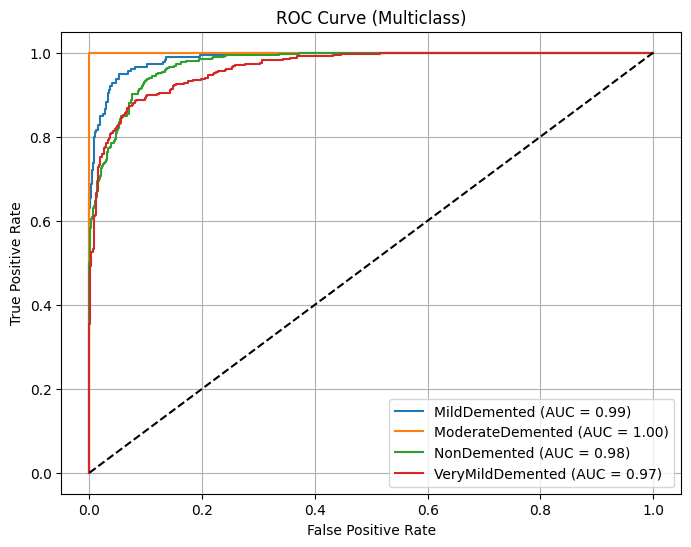

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
y_pred_bin = predictions

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(labels):
    plt.plot(fpr[i], tpr[i], label=f"{class_name} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


## Apply CNN with pyspark for multiclass classification of brain images. Show Accuracy, confusion matrix, ROC and loss curve

### Set Up Spark

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Brain MRI Classification").getOrCreate()

### Download and Unzip the Dataset

In [ ]:
import os
import shutil

# Create a .kaggle folder and move the file
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set file permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets download -d marcopinamonti/alzheimer-mri-4-classes-dataset
!unzip -q alzheimer-mri-4-classes-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/marcopinamonti/alzheimer-mri-4-classes-dataset
License(s): unknown
alzheimer-mri-4-classes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Alzheimer_MRI_4_classes_dataset/MildDemented/1 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n, A
replace Alzheimer_MRI_4_classes_dataset/MildDemented/1 (11).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_MRI_4_classes_dataset/MildDemented/1 (12).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


### Load Image Paths and Labels

In [ ]:
import pandas as pd

base_dir = "/content/Alzheimer_MRI_4_classes_dataset"

image_paths = []
labels = []

for label in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, label)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            if img_file.endswith((".jpg", ".png")):
                image_paths.append(os.path.join(class_dir, img_file))
                labels.append(label)

df = pd.DataFrame({'path': image_paths, 'label': labels})
spark_df = spark.createDataFrame(df)
spark_df.show(5)

+--------------------+----------------+
|                path|           label|
+--------------------+----------------+
|/content/Alzheime...|VeryMildDemented|
|/content/Alzheime...|VeryMildDemented|
|/content/Alzheime...|VeryMildDemented|
|/content/Alzheime...|VeryMildDemented|
|/content/Alzheime...|VeryMildDemented|
+--------------------+----------------+
only showing top 5 rows



### Preprocess and Train CNN with TensorFlow

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_size = (150, 150)

X = []
y = []

label_to_index = {label: idx for idx, label in enumerate(sorted(df['label'].unique()))}

for _, row in df.iterrows():
    img = load_img(row['path'], target_size=img_size)
    img_array = img_to_array(img) / 255.0
    X.append(img_array)
    y.append(label_to_index[row['label']])

X = np.array(X)
y = np.array(y)

from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)


### CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.4586 - loss: 1.3875 - val_accuracy: 0.6289 - val_loss: 0.8288
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6578 - loss: 0.7753 - val_accuracy: 0.7391 - val_loss: 0.5633
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7733 - loss: 0.5358 - val_accuracy: 0.7930 - val_loss: 0.4754
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.8557 - loss: 0.3632 - val_accuracy: 0.9117 - val_loss: 0.2771
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8964 - loss: 0.2691 - val_accuracy: 0.8961 - val_loss: 0.2462
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9217 - loss: 0.2066 - val_accuracy: 0.8500 - val_loss: 0.3489
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9391 - loss: 0.1734 - val_accuracy: 0.9477 - val_loss: 0.1438
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9568 - loss: 0.1116 - val_accu

### Evaluation

#### Accuracy

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 422ms/step - accuracy: 0.9662 - loss: 0.0849
Validation Accuracy: 0.9656


#### Loss Curve

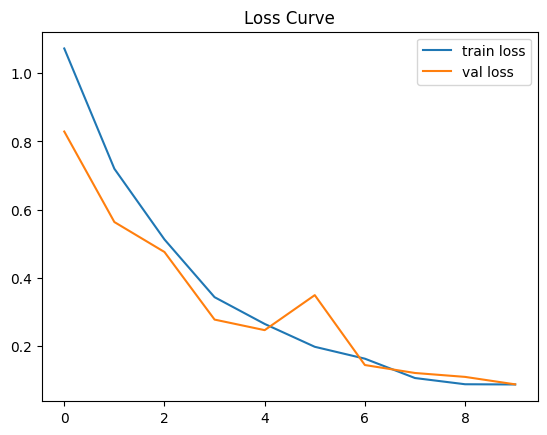

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

#### Confusion Matrix

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 366ms/step


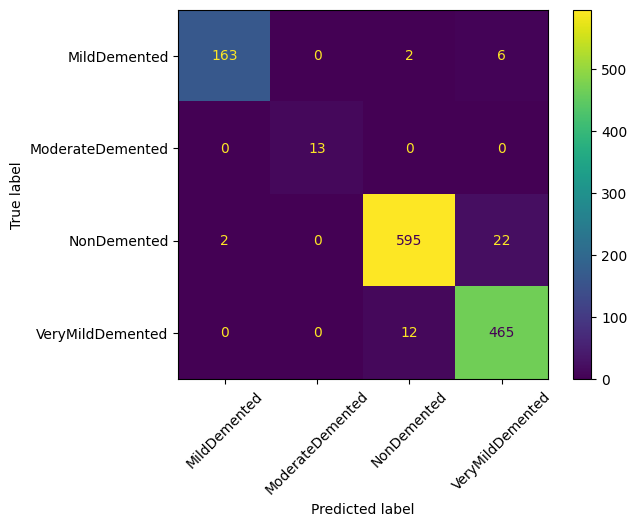

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_to_index.keys())
disp.plot(xticks_rotation=45)

#### ROC Curve

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 334ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 334ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 331ms/step


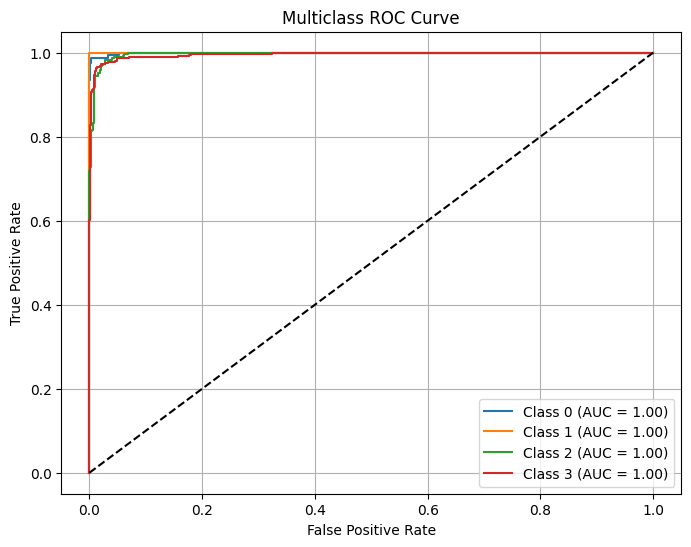

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], model.predict(X_val)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()